In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [157]:
class KNN():
    
    dist = None
    
    def __init__(_self, dist='euclidean'):
        _self.dist = dist
    
    def obter_idx_kNN(_self,X, linha, k):
        distan = _self.cal_dist(X, linha)
        idx_sort = np.argsort(distan)
        return idx_sort[0:k]
    
    def classifica(_self,X, y, linha, k):
        idx_kNN = _self.obter_idx_kNN(X, linha, k=k)
        count = np.bincount(np.int64(y[idx_kNN]))
        return np.argmax(count)

    def regressao(_self,X, y, linha, k):
        idx_kNN = _self.obter_idx_kNN(X, linha, k=k)
        return np.mean(y[idx_kNN])
    
    def dist_euclidiana(_self,X, linha):
        X_ = (X - linha) ** 2
        return np.sqrt( np.float64(np.sum(X_, axis=1)) )
    
    def manhattan_distance(_self,X, linha):
        X_ = np.abs(X - linha)
        return np.sum(X_, axis=1)
    
    def chebyshev_distance(_self,X, linha):
        X_ = np.max(np.abs(X - linha))
        return np.sum(X_)
    
    def minkowski_distance(_self,X, linha, p=2):
        X_ =  np.abs(X - linha) ** p
        return np.sum(X_,axis=1) ** (1/p)
    
    def cal_dist(_self,X, linha):
        if(_self.dist == 'euclidean'):
            return _self.dist_euclidiana(X, linha)
        if(_self.dist == 'manhattan'):
            return _self.manhattan_distance(X, linha)
        if(_self.dist == 'chebyshev'):
            return _self.chebyshev_distance(X, linha)
        if(_self.dist == 'minkowski'):
            return _self.minkowski_distance(X, linha)

### Lendo dataset

In [72]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento','petal_largura','tipo']
df = pd.read_csv('iris-dataset.csv',names=columns);

### Analisando informações

In [30]:
df.head()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_comprimento    150 non-null float64
sepal_largura        150 non-null float64
petal_comprimento    150 non-null float64
petal_largura        150 non-null float64
tipo                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [32]:
df.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df['tipo'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: tipo, dtype: int64

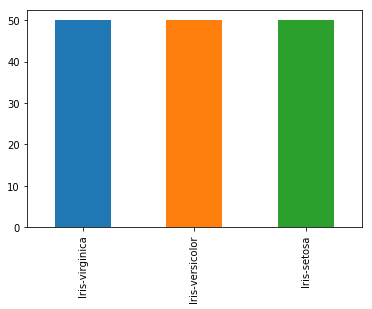

In [34]:
df['tipo'].value_counts().plot(kind='bar');

### transformando label em um float

In [73]:
df['tipo'] = np.where(df['tipo'] == 'Iris-setosa', 0,df['tipo'])
df['tipo'] = np.where(df['tipo'] == 'Iris-versicolor', 1,df['tipo'])
df['tipo'] = np.where(df['tipo'] == 'Iris-virginica', 2,df['tipo'])

### Separando features e labols

In [74]:
X = df.values[:, :-1]
y = df.values[:, -1]

### Separando train e test

In [37]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9, random_state=42, stratify=y);

### Estandartizando os dados

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
stand = StandardScaler()

Convertendo features para float64 para realizar a standatização

In [76]:
X_train = np.float64(X_train)
X_test = np.float64(X_test)

Estandartizando

In [77]:
X_train_std = stand.fit_transform(X_train);
X_test_std = stand.transform(X_test);

# Criando modelos

#### Definindo K e Linha

In [131]:
k = [1, 3 , 5]

In [83]:
linha = [4,2,7,8]

#### Distancia Euclidean

In [147]:
modelKNN = KNN(dist='euclidean')

In [148]:
for i in k:
    print("K = ",i," | Classificacao ",modelKNN.classifica(X,y,linha,i))

K =  1  | Classificacao  2
K =  3  | Classificacao  2
K =  5  | Classificacao  2


#### Distancia Manhattan

In [152]:
modelKNN = KNN(dist='manhattan')

In [153]:
for i in k:
    print("K = ",i," | Classificacao ",modelKNN.classifica(X,y,linha,i))

K =  1  | Classificacao  2
K =  3  | Classificacao  2
K =  5  | Classificacao  2


#### Distancia Chebyshev

In [158]:
modelKNN = KNN(dist='chebyshev')

In [159]:
for i in k:
    print("K = ",i," | Classificacao ",modelKNN.classifica(X,y,linha,i))

K =  1  | Classificacao  0
K =  3  | Classificacao  0
K =  5  | Classificacao  0


#### Distancia Minkowski

In [160]:
modelKNN = KNN(dist='minkowski')

In [161]:
for i in k:
    print("K = ",i," | Classificacao ",modelKNN.classifica(X,y,linha,i))

K =  1  | Classificacao  2
K =  3  | Classificacao  2
K =  5  | Classificacao  2


### KNN sklearn

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
modelKNN_skl = KNeighborsClassifier(n_neighbors=1)

In [144]:
for i in k:
    modelKNN_skl = KNeighborsClassifier(n_neighbors=i)
    modelKNN_skl.fit(X,y)
    print("K = ",i," | Classificacao ",modelKNN_skl.predict(linha))

ValueError: Unknown label type: 'unknown'